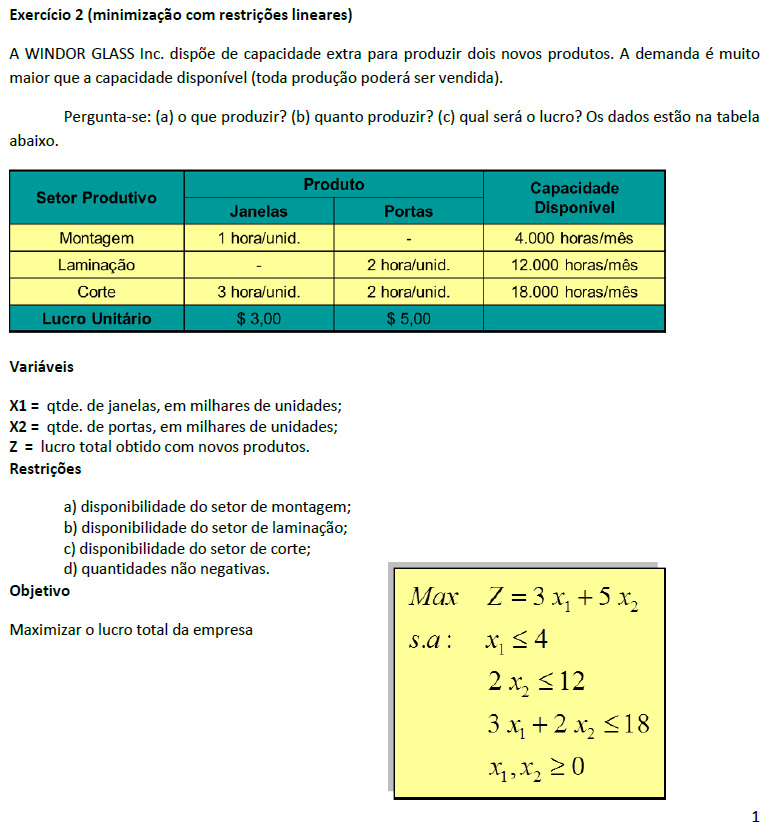

## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



In [3]:
# Função Objetivo
def objective_function(individual):
  return (individual[0]*3 + individual[1]*5),

def feasible(individual):
  # disponibilidade do setor de montagem
  if individual[0]*1 > 4000:
    return False
  # disponibilidade do setor de laminação
  if individual[1]*2 > 12000:
    return False
  # disponibilidade do setor de corte
  if individual[0]*3 + individual[1]*2 > 18000:
    return False
  # quantidades não negativas
  if (individual[0] < 0) or (individual[1] < 0):
    return False
  return True

def distance(individual):
  constraint1 = abs(individual[0]*1 - 4000)
  constraint2 = abs(individual[1]*2 - 12000)
  constraint3 = abs(individual[0]*3 + individual[1]*2 - 18000)
  return constraint1 + constraint2 + constraint3

In [4]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMax)   # indivíduo

In [5]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_int", random.randint, 0, 30000) # variáveis inteiras

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2)   # 2: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [6]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=30000, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [7]:
pop = toolbox.population(n=150)                            # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [8]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=1000, stats=stats, halloffame=hof)

gen	nevals	avg     	std    	min    	max  
0  	150   	-84829.8	45376.8	-203036	27609
1  	76    	-46139.6	33354.7	-150748	27609
2  	80    	-19604  	23146.6	-86712 	31970
3  	76    	-2585.14	19074.5	-41436 	31970
4  	86    	11521.6 	19799.2	-81420 	32071
5  	83    	24848   	11109.8	-46250 	33644
6  	79    	28162.2 	18093.4	-143968	33644
7  	79    	30499.1 	8403.78	-52584 	33818
8  	80    	31075.6 	5631.32	-2780  	33818
9  	77    	31076.1 	5918.39	-3034  	33818
10 	83    	30325.3 	7945   	-3034  	33818
11 	80    	29199.9 	11597.6	-40492 	33818
12 	80    	28080.2 	15369  	-97460 	33818
13 	79    	28434.6 	11301.4	-3034  	33818
14 	85    	26842.2 	14581.9	-60606 	33818
15 	82    	31174.6 	8708   	-3034  	33818
16 	68    	32988.6 	10095.5	-90242 	33818
17 	83    	33806.7 	137.527	32128  	33818
18 	76    	32122.8 	12470.9	-88012 	33818
19 	88    	33818   	0      	33818  	33818
20 	80    	33048.3 	9395.3 	-81636 	33818
21 	82    	32273.3 	13338  	-92060 	33818
22 	81    	33270.2 	6686.26	-48346

## Resultados

In [9]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[2133, 5763]
Melhor Resultado da Função Objetivo:


(35214,)

###Gráfico da Evolução

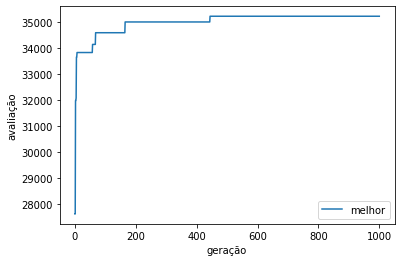

In [10]:
import matplotlib.pyplot as plt
gen, max, avg = log.select('gen', 'max', 'avg')
plt.plot(gen, max, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.legend();

###Analise do resultado:

In [11]:
  print('Horas na Montagem: {}'.format(hof[0][0]))
  print('Horas na Laminação: {}'.format(hof[0][1]*2))
  print('Horas no Corte: {}'.format(hof[0][0]*3+hof[0][1]*2))

Horas na Montagem: 2133
Horas na Laminação: 11526
Horas no Corte: 17925
